In [2]:
import warnings
warnings.filterwarnings("ignore")
import re
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

# Distributions of target properties

### Load Data

In [4]:
df = pd.read_csv('Data/oqmd_cleaned.csv')

### Adjustments for the plots

In [5]:
df = df[df.delta_e>-100]
plt.rc('xtick', labelsize=60)
plt.rc('xtick.major', size=40, width=6, pad=30)
plt.rc('ytick.major', size=40, width=6, pad=30)
plt.rc('ytick', labelsize=60)
plt.rc('axes',linewidth=6)
plt.rc('axes',linewidth=6, labelsize=60, labelpad=30)

In [14]:
def plot(data, name, color='blue'):
    y,x = np.histogram(data,bins=np.arange(min(data), max(data) + 1, 1))
    x = (x[1:] + x[:-1])/2
    x = np.delete(x, np.where(y==0))
    y = np.delete(y, np.where(y==0))

    plt.figure(figsize=(30,14))
    sns.distplot(data,bins=np.arange(min(data), max(data) + 1, 1), color=color, hist_kws={"alpha":1, "histtype":"stepfilled"}, kde=False)
    plt.xlabel(name)
    plt.ylabel('Frequency')
    plt.yscale('log')
    plt.plot(x,y, linewidth=10, color='k')
    plt.show()

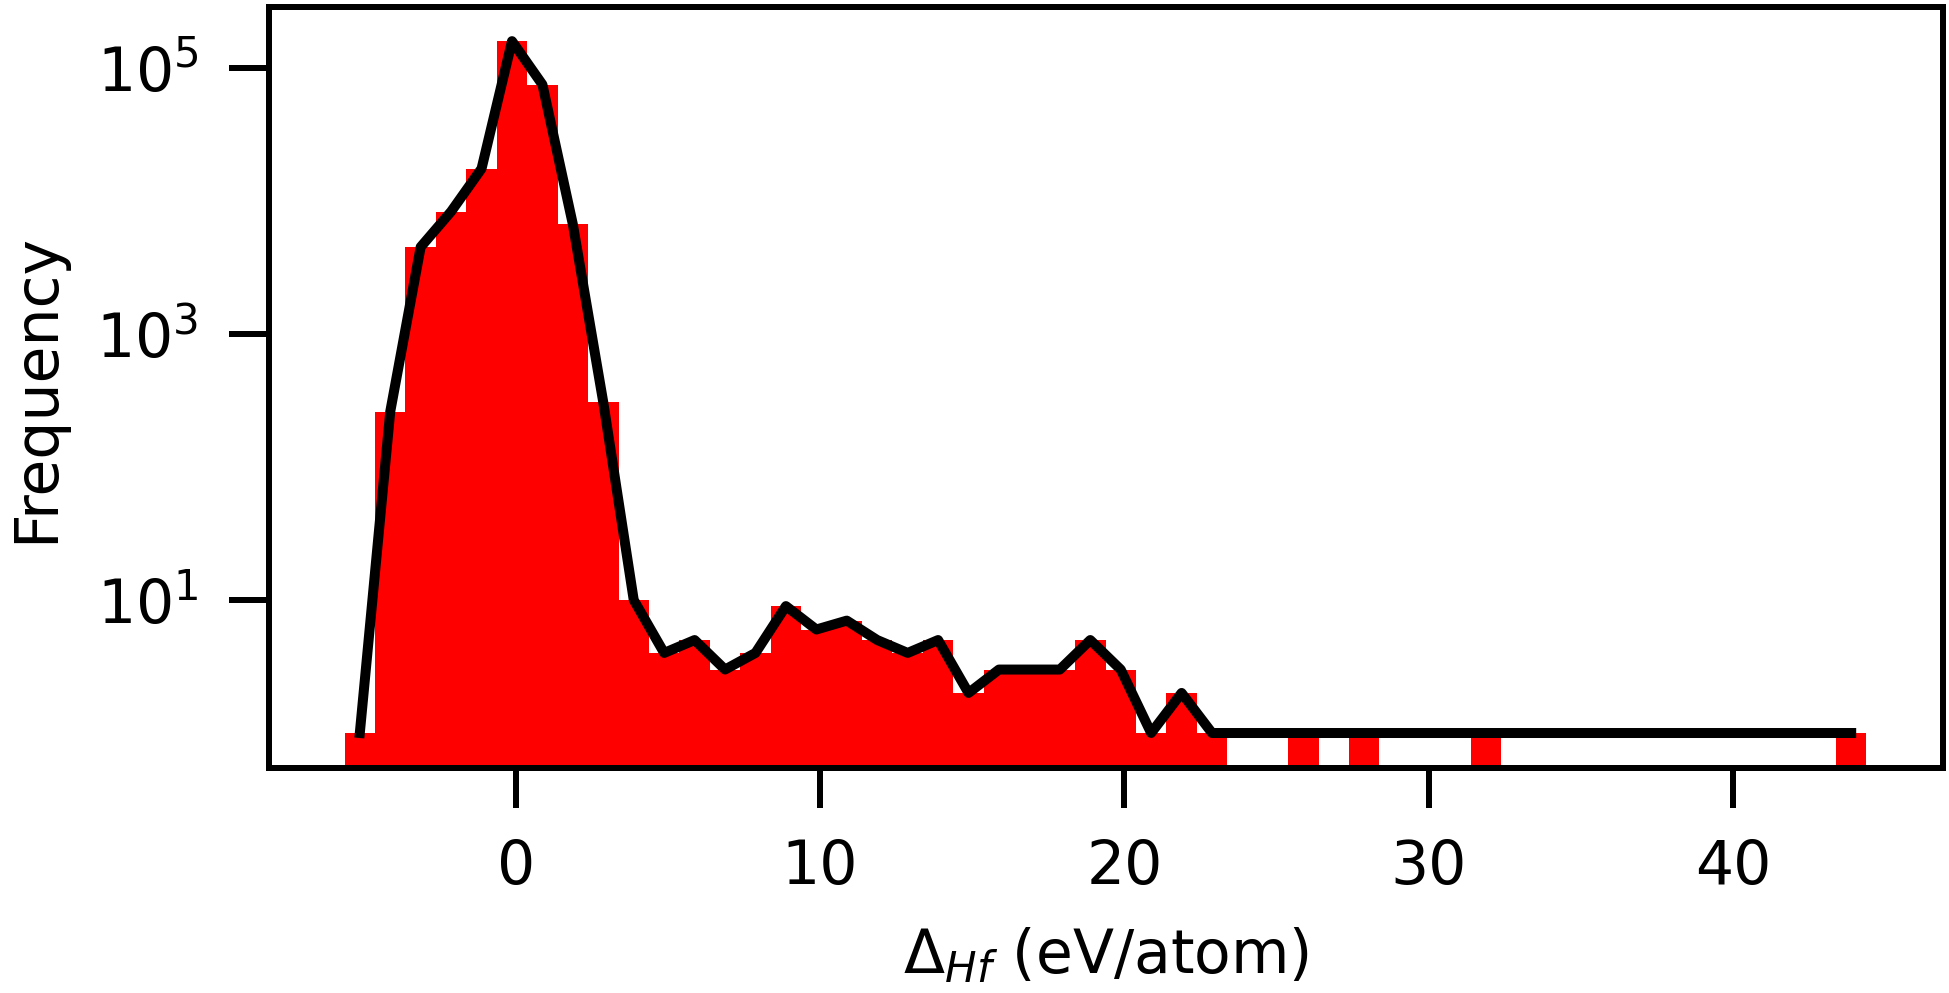

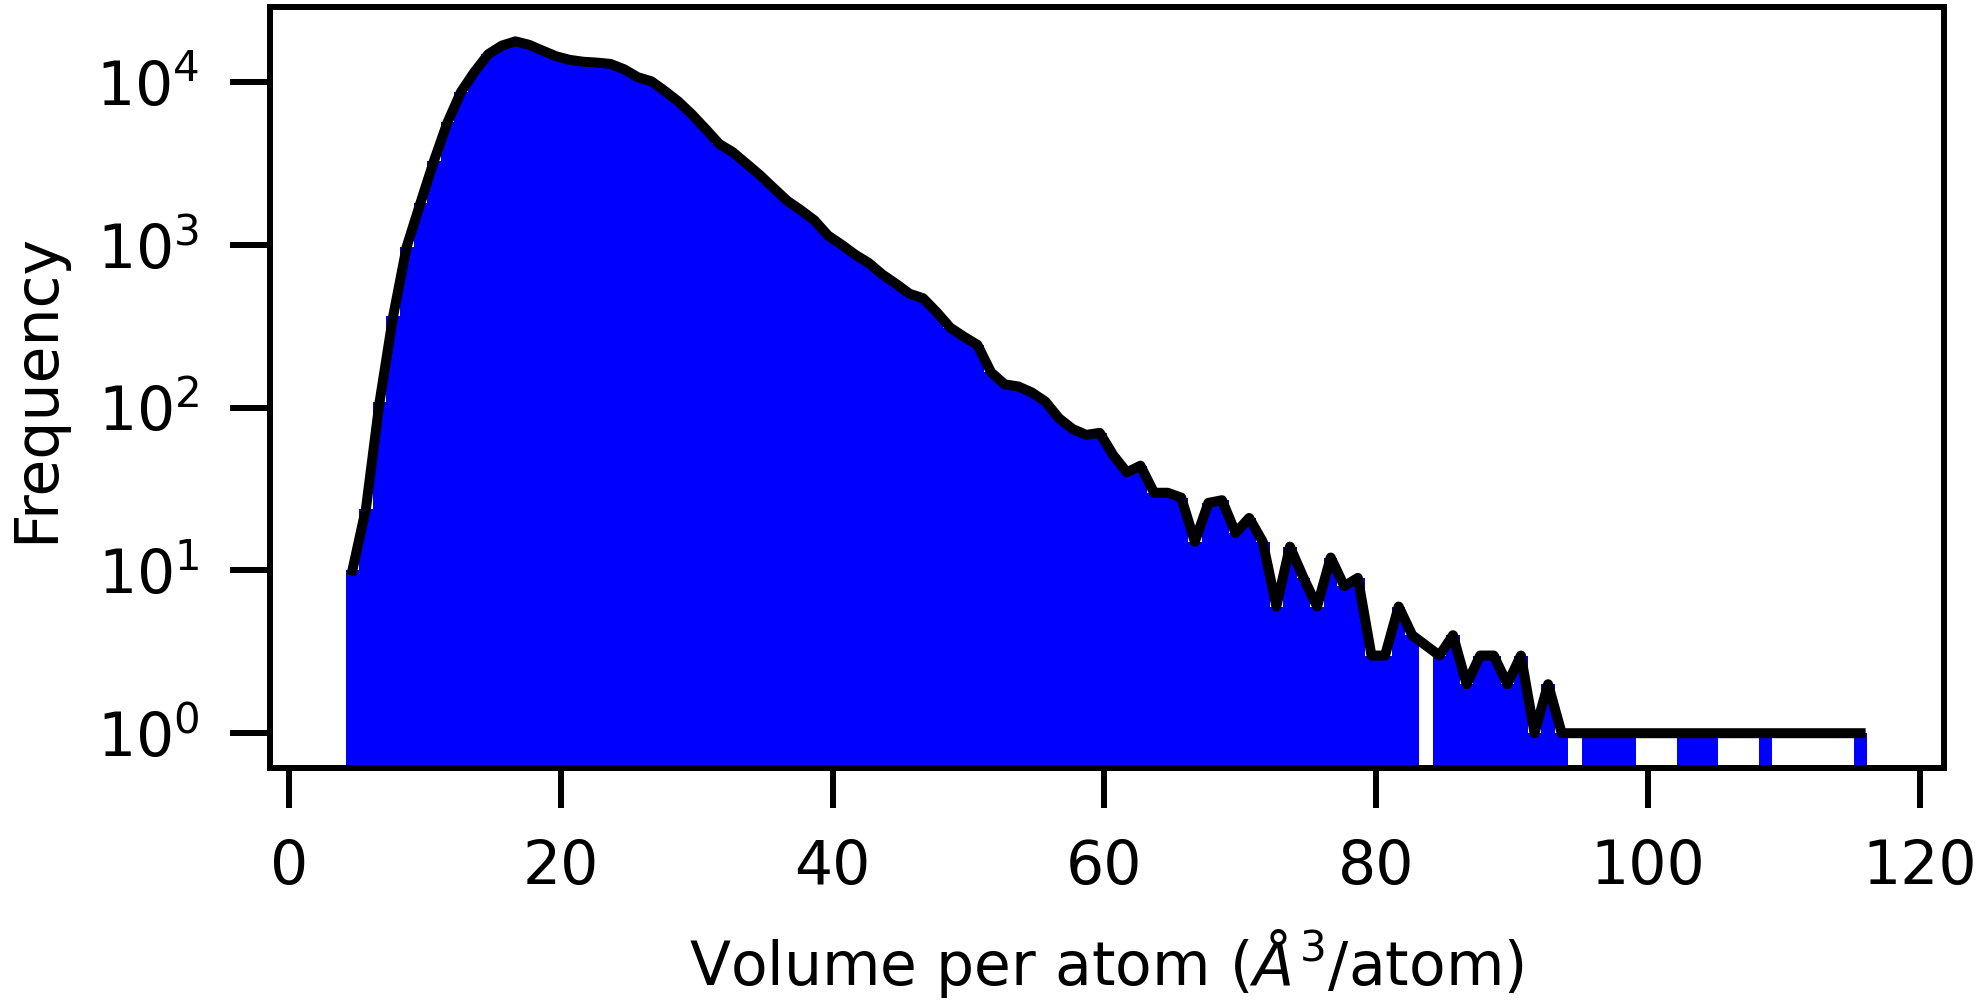

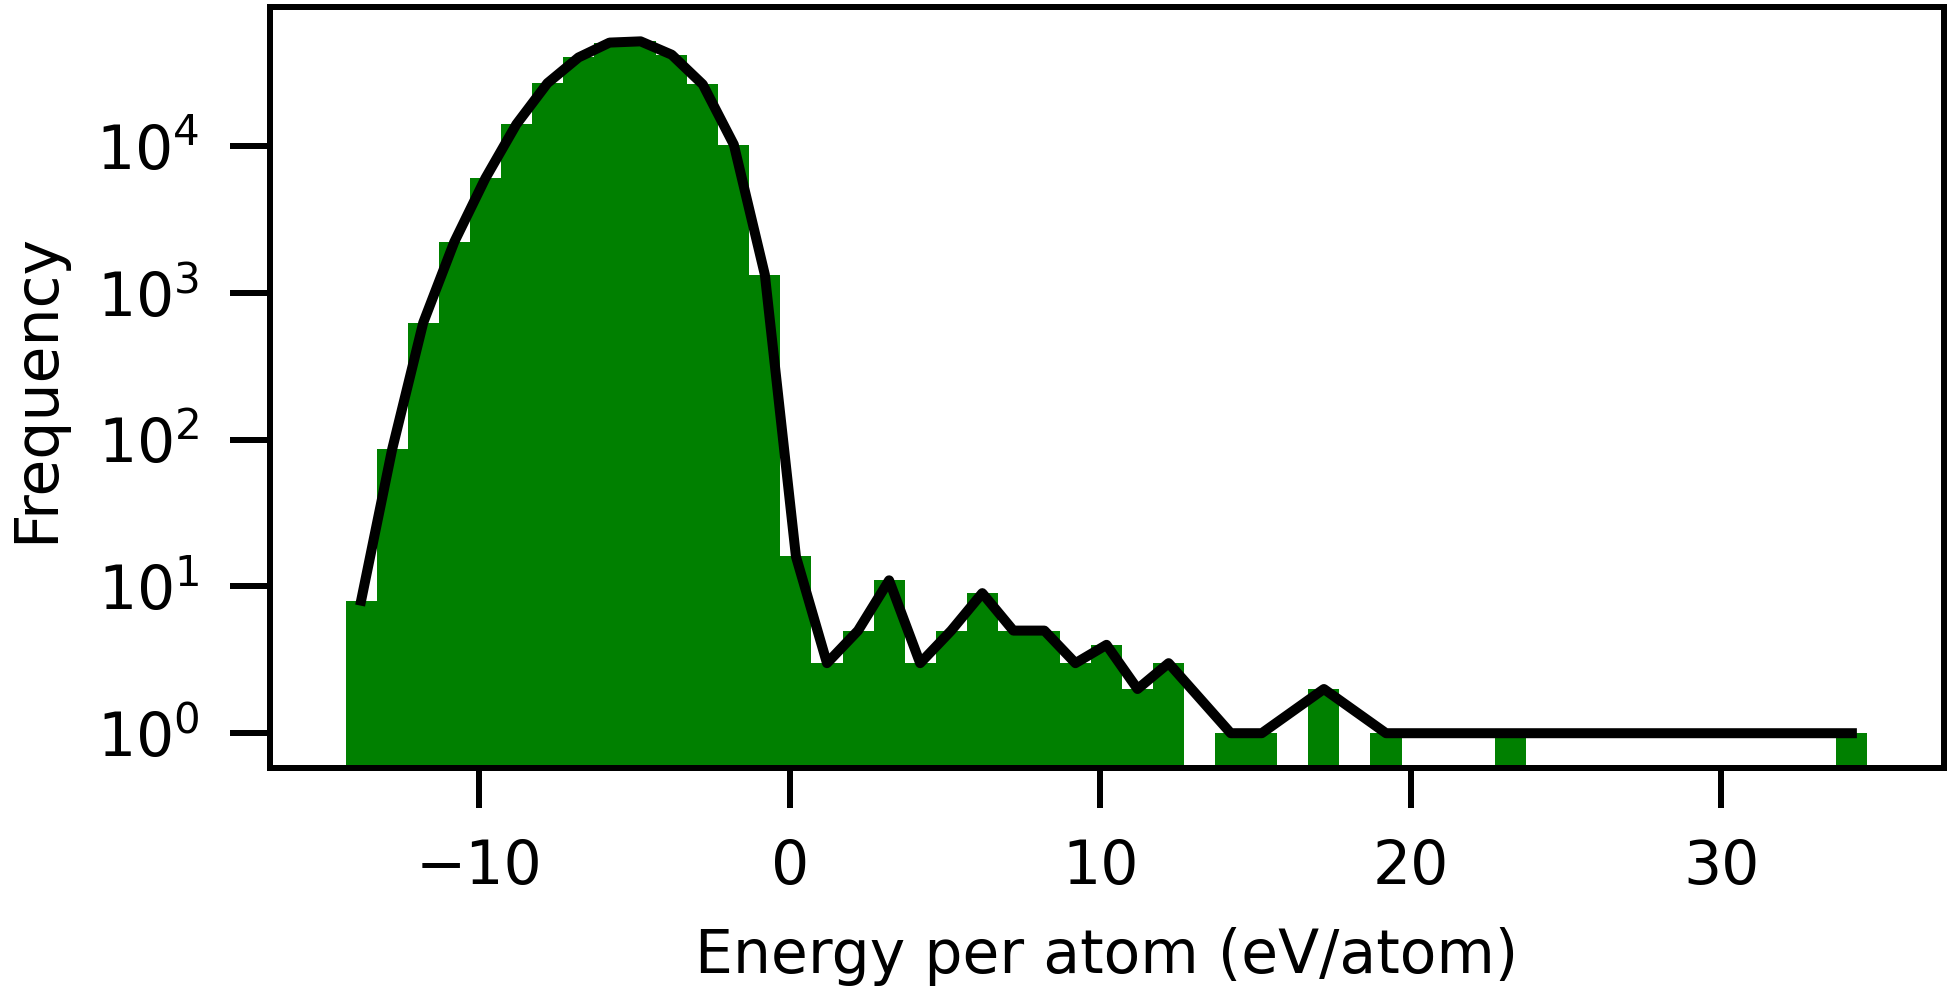

In [15]:
plot(df.delta_e.values, r'$\Delta_{Hf}$ (eV/atom)', 'red')
plot(df.volume_pa.values, r'Volume per atom ($\AA^3$/atom)')
plot(df.energy_pa.values, r'Energy per atom (eV/atom)', 'green')